## DATASET DESCRIPTION

The dataset is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

**Attribute Information:**

**Date, time year-month-day hour:minute**:second

**Appliances**, energy use in Wh

**lights**, energy use of light fixtures in the house in Wh

**T1**, Temperature in kitchen area, in Celsius

**RH_1**, Humidity in kitchen area, in %

**T2**, Temperature in living room area, in Celsius

**RH_2**, Humidity in living room area, in %

**T3**, Temperature in laundry room area

**RH_3**, Humidity in laundry room area, in %

**T4**, Temperature in office room, in Celsius

**RH_4**, Humidity in office room, in %

**T5**, Temperature in bathroom, in Celsius

**RH_5**, Humidity in bathroom, in %

**T6**, Temperature outside the building (north side), in Celsius

**RH_6**, Humidity outside the building (north side), in %

**T7**, Temperature in ironing room , in Celsius

**RH_7**, Humidity in ironing room, in %

**T8**, Temperature in teenager room 2, in Celsius

**RH_8**, Humidity in teenager room 2, in %

**T9**, Temperature in parents room, in Celsius

**RH_9**, Humidity in parents room, in %

**To**, Temperature outside (from Chievres weather station), in Celsius

**Pressure** (from Chievres weather station), in mm Hg

**RH_out**, Humidity outside (from Chievres weather station), in %

**Wind speed** (from Chievres weather station), in m/s

**Visibility** (from Chievres weather station), in km

**Tdewpoint** (from Chievres weather station), Â°C

**rv1**, Random variable 1, nondimensional

**rv2**, Random variable 2, nondimensional

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

In [87]:
df = pd.read_csv('energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [89]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)
simple_linear_reg_df

,T2,T6
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000
8260,17.356667,5.000000
12299,19.000000,5.300000
13505,22.700000,17.133333
12913,19.593333,7.545000
17788,21.890000,9.190000


<AxesSubplot:xlabel='T2', ylabel='T6'>

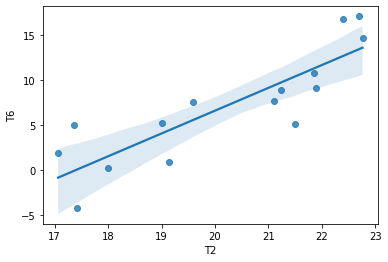

In [90]:
#regression plot
sns.regplot(x="T2", y="T6",
            data=simple_linear_reg_df)

In [91]:
df = df. drop(['date' , 'lights'], axis=1)

In [99]:
from sklearn.preprocessing import MinMaxScaler

x= df.drop(columns=['Appliances'], axis=1)
y= df['Appliances'] # Target

scaler = MinMaxScaler()
normalised_df = scaler.fit_transform(df)

In [102]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalised_df, y, test_size= 0.3 , random_state= 1 )

In [113]:
x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0]

(13814, 5921, 13814, 5921)

In [115]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [117]:
y_pred = reg.predict(x_test)

In [118]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 3)

0.0

In [119]:
rss = np.sum(np.square(y_test - y_pred))
round(rss, 2 )

0.0

In [120]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3 )

0.0

In [121]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 3 )

1.0

In [122]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4 )
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [123]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [126]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name) :
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'x' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df

In [127]:
linear_model_weights = get_weights_df(linear_model, x_train, 'linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='x')
final_weights = pd.merge(final_weights, lasso_weights_df, on='x')
final_weights

AttributeError: 'numpy.ndarray' object has no attribute 'columns'